### Fundamentos de Linguagem Python do Básico a  Aplicação de IA

#### Mini-Projeto 1

##### Análise de Vendas Para Loja de E-commerce com Pandas, Numpy e Matplotlib

**Aprendizado Orientado a Projetos oferecido pela Data Science Academy (DSA)**

datascienceacademy.com.br

**1. Definição do problema de negócio**

A loja de e-commerce está em fase de crescimento, registrando um volume cada vez maior de transações diárias. No entanto,  essa grande quantidade de dados de venda, em seu estado bruto, é com oum baú de tesouros trancado: sabemos que há valor ali mas não conseguimos acessá-lo.

Atualmente, muitas de nossa decisões estratégicas são baseadas em intuição e observações parciais, o que nos leva a enfrentar os seguintes desafios:

    Gestão de estoque ineficiente: Não temos clareza sobre quais produtos são nossos "campeões de venda" e quais estão parados na prateleira. Isso resulta em excesso de estoque de itens de baixa procura e falta de produtos de alta demanda.

    Marketing com baixo retorno: Nossas campanhas de marketiong são genéricas, pois não sabemos quais categorias de produtos atraem mais os clientes ou em quais regiões geográficas nosso público está mais concentrado.

    Perda de oportunidades sazonais: Não conseguimos identificar padrões ou tendências de vendas ao longo dos meses. Isso nos impede de planejar promoções estratégicas para períodos de alta ou de criar ações para impucionar as vendas em meses de baixa.

    Expansão sem direção: Temos o desejo de expandir, mas não sabemos quis mercados regionais são mais promissores ou onde nossos esforços logísticos deveriam ser focados.

    O problema central é a falta de visibilidade clara sobre a performance do negócio, o que nos impede de tomar decisões rápidas, inteligentes e baseadas em evidências.

**1.2. Objetivos do projeto**

    Este projeto de análise de dados visa transformar nossos dados brutos  em insights acionáveis. O objetivo é  responder a quantro perguntas de negócio fundamentais:

    - O que vender? Identificar os produtos de maior sucesso para otimizar o portifólio e estoque.

    - Onde focar: Compreender quais categorias de produtos geram a maior parte da receita.

    - Quando agir? Analisar a performance de vendas ao longo do tempo para identificar tendências, picos e sazonalidades.

    - Para onde expandir? Mapear a distribuição geográfica de nossas vendas para  descobrir nossos mercados mais fortes.

**2. Import das Bibliotecas**

In [1]:
# Instalando o watermark
!pip install -q -U watermark

In [2]:
# Importação das bibliotecas para manipulação de dados em tabelas
import pandas as pd

# Importação da biblioteca Numpy para operações matemáticas e arrays
import numpy as np

# Importação da biblioteca matplotlib para a geração de gráficos
import matplotlib.pyplot as plt

# Importação da biblioteca seaborn para visualização estatística de dados
import seaborn as sns

# Importação da biblioteca Random para geração de números aleatórios
import random

#Importação das classes datetime e timedelta para manipulação de datas e intervalos de tempo
from datetime import datetime, timedelta

# Comando mágico do jupyter notebook para permitir exibir gráficos diretamente no  notebook
%matplotlib inline

In [3]:
%reload_ext watermark
%watermark -a "Leonardo da Silva Neves"

Author: Leonardo da Silva Neves



In [4]:
%watermark --iversions

matplotlib: 3.9.2
numpy     : 1.26.4
pandas    : 2.3.1
seaborn   : 0.12.2



In [5]:
# Para usar uma versão específica de um pacote, podemos fazer assim:
!pip install -q pandas==2.3.1

**3. Função para geração de dados fictícios**

In [12]:
# Definição da função para gerar dados fictícios de vendas
def gera_dados(num_registros = 600):
    """
    Gera um DataFrame do Pandas com dados de venda fictícios
    """
    # Mensagem inicial indicando a quantidade de registros a serem gerados
    print(f"\nIniciando a geração de {num_registros} registros de vendas...")

    # Dicionário com produtos, suas categorias e preços
    produtos = {
        'Laptop Gamer': {'categoria': 'Eletrônicos', 'preco':7500.00},
        'Mouse Vertical': {'categoria': 'Acessórios', 'preco':250.00},
        'Teclado Mecânico':{'categoria': 'Acessórios', 'preco':550.00},
        'Monitor Ultrawide':{'categoria': 'Eletrônicos','preco':2000.00},
        'Cadeira Gamer': {'categoria': 'Móveis', 'preco': 1200.00},
        'Headset 7.1': {'categoria': 'Acessórios', 'preco': 800.00},
        'Placa de Vídeo': {'categoria': 'Hardware', 'preco': 4500.00},
        'SSD 1TB': {'categoria': 'Hardware', 'preco': 600.00}
    }

    # Cria uma lista apenas com os nomes dos produtos
    lista_produtos = list(produtos.keys())

    # Dicionário com cidades e seus respectivos estados
    cidades_estados = {
        'São Paulo': 'SP', 'Rio de Janeiro': 'RJ', 'Belo Horizonte': 'MG',
        'Porto Alegre': 'RS', 'Salvador': 'BA', 'Curitiba':'PR', 'Fortaleza':'CE'
    }

    # Cria uma lista apenas com os nomes das cidades
    lista_cidades = list(cidades_estados.keys())

    # Lista que armazenará os registros de vendas
    dados_vendas = []

    # Define a data início dos pedidos
    data_inicial = datetime(2026, 1, 1)

    # Loop para gerar os registros de vendas
    for i in range(num_registros):

        # Seleciona aleatoriamente os produtos
        produto_nome = random.choice(lista_produtos)

        # Selecionando aleatoriamente as cidades
        cidade = random.choice(lista_cidades)

        # Gera uma quantidade de produtos vendidos entre 1 e 7
        quantidade = np.random.randint(1, 8)

        # Calcula a data do pedido a partir da data inicial
        data_pedido = data_inicial + timedelta(days = int(i/5), hours = random.randint(0, 23))

        # Se o produto for mouse ou teclado, aplica um desconto aleatório de até 10%
        if produto_nome in ['Mouse Vertical', 'Teclado Mecânico']:
            preco_unitario = produtos[produto_nome]['preco'] * np.random.uniform(0.9, 1.0)

        else:
            preco_unitario = produtos[produto_nome]['preco']

        # Adiciona um registro de venda à lista
        dados_vendas.append({
            'ID_Pedido':1000 + i,
            'Data_Pedido': data_pedido,
            'Nome_Produto': produto_nome,
            'Categoria': produtos[produto_nome]['categoria'],
            'Preco_Unitario': round(preco_unitario, 2),
            'Quantidade': quantidade,
            'ID_Cliente': np.random.randint(100,150),
            'Cidade': cidade,
            'Estado': cidades_estados[cidade]
        })

    # Mensagem final indicando que a geração terminau
    print("Geração de dados concluida.\n")

    # Retorna os dados no formato de DataFrame
    return pd.DataFrame(dados_vendas)

**4. Gerar, Carregar e Explorar os Dados**

In [14]:
# Gerar os dados chamando a função da célula anterior
df_vendas = gera_dados(500)


Iniciando a geração de 500 registros de vendas...
Geração de dados concluida.



In [22]:
# Tipo do objeto
type(df_vendas)

pandas.core.frame.DataFrame

In [15]:
# Shape
df_vendas.shape

(500, 9)

In [16]:
# Exibir as cinco primeiros linhas do dataframe
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
0,1000,2026-01-01 05:00:00,Cadeira Gamer,Móveis,1200.00,5,137,Curitiba,PR
1,1001,2026-01-01 01:00:00,SSD 1TB,Hardware,600.00,2,149,Rio de Janeiro,RJ
2,1002,2026-01-01 16:00:00,Teclado Mecânico,Acessórios,529.58,4,113,Fortaleza,CE
3,1003,2026-01-01 10:00:00,Laptop Gamer,Eletrônicos,7500.00,2,120,Fortaleza,CE
4,1004,2026-01-01 01:00:00,Teclado Mecânico,Acessórios,506.12,2,105,Belo Horizonte,MG


In [23]:
# Exibindo as últimas cinco linhas
df_vendas.tail()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
495,1495,2026-04-10 09:00:00,Headset 7.1,Acessórios,800.00,1,147,Fortaleza,CE
496,1496,2026-04-10 19:00:00,Headset 7.1,Acessórios,800.00,7,123,Salvador,BA
497,1497,2026-04-10 06:00:00,Mouse Vertical,Acessórios,241.81,4,104,Rio de Janeiro,RJ
498,1498,2026-04-10 23:00:00,Laptop Gamer,Eletrônicos,7500.00,7,103,Curitiba,PR
499,1499,2026-04-10 01:00:00,Placa de Vídeo,Hardware,4500.00,1,125,São Paulo,SP


In [17]:
# Exibir informações gerais sobre o dataframe (tipos de dados, valores nulos)
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[ns]
 2   Nome_Produto    500 non-null    object        
 3   Categoria       500 non-null    object        
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    object        
 8   Estado          500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 35.3+ KB


In [18]:
# Resumo estatístico
df_vendas.describe()

,ID_Pedido,Data_Pedido,Preco_Unitario,Quantidade,ID_Cliente
count,500.000000,500,500.000000,500.000000,500.000000
mean,1249.500000,2026-02-19 23:14:52.799999744,2170.928540,3.976000,124.996000
min,1000.000000,2026-01-01 01:00:00,225.660000,1.000000,100.000000
25%,1124.750000,2026-01-26 02:45:00,600.000000,2.000000,113.000000
50%,1249.500000,2026-02-19 23:30:00,800.000000,4.000000,125.000000
75%,1374.250000,2026-03-16 22:45:00,2625.000000,6.000000,137.000000
max,1499.000000,2026-04-10 23:00:00,7500.000000,7.000000,149.000000
std,144.481833,NaN,2417.234549,2.000858,14.303887


In [19]:
# Tipos de dados
df_vendas.dtypes

ID_Pedido                  int64
Data_Pedido       datetime64[ns]
Nome_Produto              object
Categoria                 object
Preco_Unitario           float64
Quantidade                 int64
ID_Cliente                 int64
Cidade                    object
Estado                    object
dtype: object

**5. Limpeza, Pré-Processamento e Engenharia de Atributos**

In [25]:
# Se a coluna 'Data_Pedido' não estiver com tipo datetime, precisamos fazer a conversão explícita
# A coluna pode ser usada para análise temporal
df_vendas['Data_Pedido'] = pd.to_datetime(df_vendas['Data_Pedido'])

In [27]:
# Engenharia de atributos
# Criando a coluna 'Faturamento' (preço x quantidade)
df_vendas['Faturamento'] = df_vendas['Preco_Unitario'] * df_vendas['Quantidade']

In [28]:
# Engenharia de atributos
# Usando uma função lambda para criar uma coluna de status de entrega
df_vendas['Status_Entrega'] = df_vendas['Estado'].apply(lambda estado: 'Rápida' if estado in ['SP', 'RJ', 'MG'] else 'Normal')

In [29]:
# Exibindo informações gerais sobre o datafreme (tipos de dados, valores não nulos)
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[ns]
 2   Nome_Produto    500 non-null    object        
 3   Categoria       500 non-null    object        
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    object        
 8   Estado          500 non-null    object        
 9   Faturamento     500 non-null    float64       
 10  Status_Entrega  500 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 43.1+ KB


In [30]:
# Exibindo as cinco primeiras linhas novamente para ver as novas colunas
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega
0,1000,2026-01-01 05:00:00,Cadeira Gamer,Móveis,1200.00,5,137,Curitiba,PR,6000.00,Normal
1,1001,2026-01-01 01:00:00,SSD 1TB,Hardware,600.00,2,149,Rio de Janeiro,RJ,1200.00,Rápida
2,1002,2026-01-01 16:00:00,Teclado Mecânico,Acessórios,529.58,4,113,Fortaleza,CE,2118.32,Normal
3,1003,2026-01-01 10:00:00,Laptop Gamer,Eletrônicos,7500.00,2,120,Fortaleza,CE,15000.00,Normal
4,1004,2026-01-01 01:00:00,Teclado Mecânico,Acessórios,506.12,2,105,Belo Horizonte,MG,1012.24,Rápida


**6. Análise 1 - Top 10 Produtos Mais Vendidos**

Quais os top 10 produtos mais vendidos?

In [31]:
# Agrupar por nome do produto, soma a quantidade e ordena para encontrar os mais vendidos
top10_produtos = df_vendas.groupby('Nome_Produto')['Quantidade'].sum().sort_values(ascending = False).head(10)

In [32]:
# Exibe o resultado
top10_produtos

Nome_Produto
SSD 1TB              311
Cadeira Gamer        262
Laptop Gamer         262
Headset 7.1          254
Placa de Vídeo       232
Teclado Mecânico     226
Mouse Vertical       224
Monitor Ultrawide    217
Name: Quantidade, dtype: int64

<Figure size 1200x700 with 0 Axes>

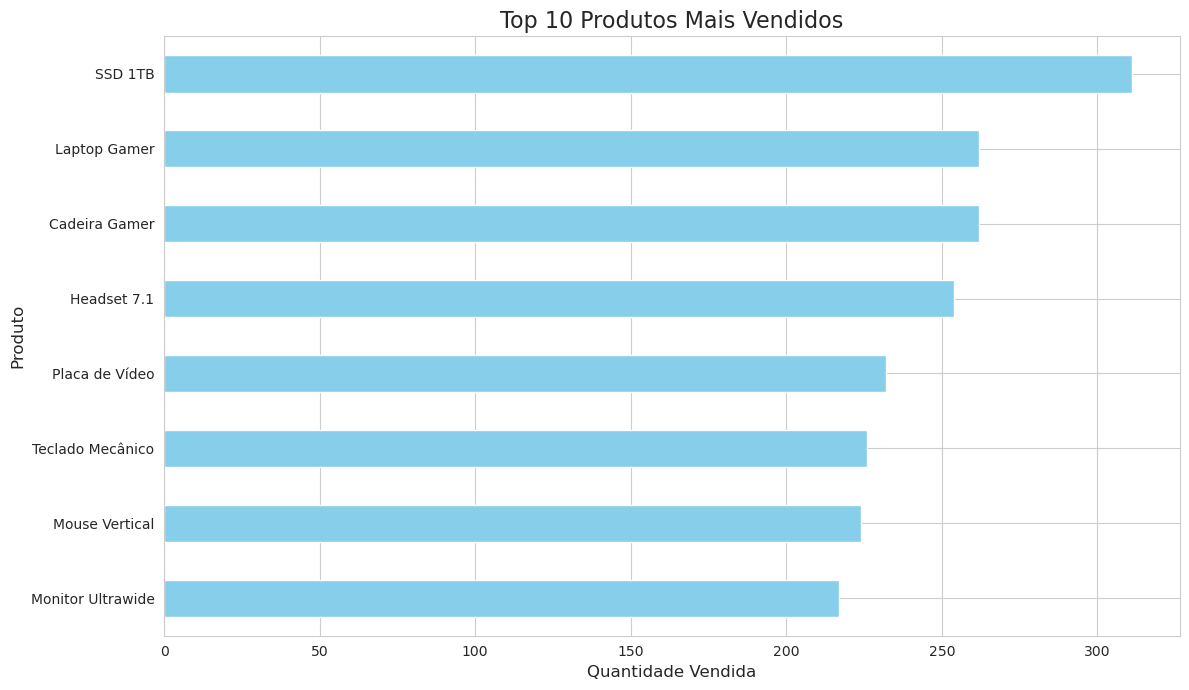

In [35]:
# Define um estilo para os gráficos
sns.set_style("whitegrid")

# Cria a figura e os eixos
plt.figure(figsize=(12, 7))

# Cria um gráfico  de barras horizontais
top10_produtos.sort_values(ascending = True).plot(kind = 'barh', color = 'skyblue')

# Adicionando títulos e labels
plt.title("Top 10 Produtos Mais Vendidos", fontsize = 16)
plt.xlabel("Quantidade Vendida", fontsize = 12)
plt.ylabel("Produto", fontsize = 12)

# Exibe o gráfico
plt.tight_layout()
plt.show()